<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/only_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and import libraries

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install sly
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 1896, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 1896 (delta 18), reused 57 (delta 15), pack-reused 1827
Receiving objects: 100% (1896/1896), 27.41 MiB | 16.41 MiB/s, done.
Resolving deltas: 100% (918/918), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-ehborqig
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-ehborqig
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=ffe86e832a93242222ea898a2e6914366d7d6e94cd672e9b0f195b24e3934baa
  Stored in directory: /tmp/pip-ephem-wheel-cache-99zk6jdg/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc90

In [2]:
from PIL import Image
from features.image_manager import ImageFeature
from caption_models.blip2 import BLIP2
from caption_models.blip import BLIP
image_path = '../../images/'

blip = BLIP
blip.import_model()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

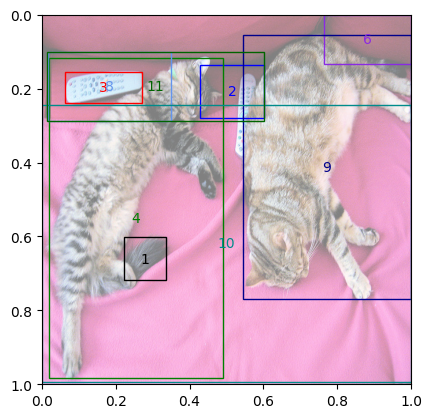

In [3]:
# image = Image.open('../../images/image_6.jpg').convert("RGB")
image = ImageFeature('../../images/image_1.jpg', None)
image.plot_regions()

In [4]:
captions = [blip.caption(im.image) for im in image]
# caption = blip.caption(image[8].image)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


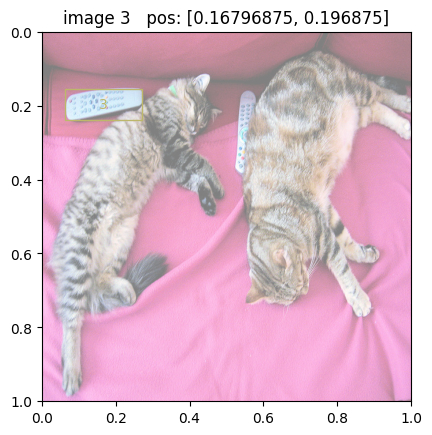

a cat that is holding a remote control in its mouth


In [5]:
image.plot_from_index(3)
print(captions[3])

### Utils

In [6]:
from similaritys.similarity import Similarity
from features.features import Text

def print_sim(text,image, print_neigh_sims = False):
    cosine_similitary = Similarity.cosine(text,image)
    cosine_and_pos_similitary = Similarity.cosine_and_pos(text,image)
    end_similitary = Similarity.calculate(text,image, print_ = print_neigh_sims)

    print(f'SIMILARITY')
    print(f'   ⦿ cosine: {cosine_similitary}')
    print(f'   ⦿ cosine_pos: {cosine_and_pos_similitary}')
    print(f'   ⦿ using region relation: {end_similitary}')

def full_sim(texts, images):
    sim = Similarity.full(texts, images)
    return sim

### Dataset and Retrieval

In [7]:
from retrieval_system.data import ImagesDataset

data = ImagesDataset()
data.load_from_images_path(image_path, True)

../../images/image_3.jpg
../../images/image_15.jpeg
../../images/image_6.jpg
../../images/image_13.jpeg
../../images/image_11.jpeg
../../images/image_5.png
../../images/image_12.jpeg
../../images/image_4.jpg
../../images/image_7.jpg
../../images/image_9.jpeg
../../images/image_2.jpg
../../images/image_1.jpg
../../images/image_10.jpeg
../../images/image 8.jpg
../../images/image_14.jpeg


In [8]:
data.append('../../images/image 8.jpg')

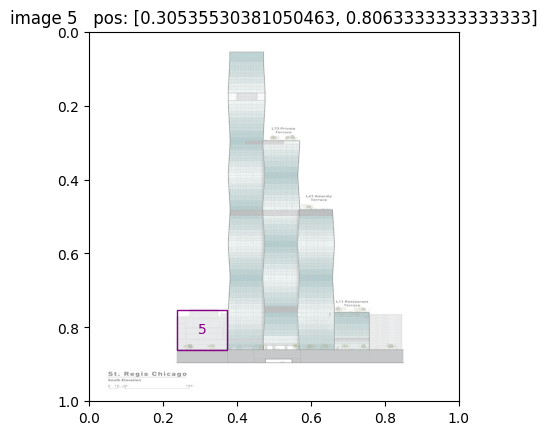

In [9]:
data[-1].plot_from_index(4)

In [10]:
from features.text_manager import TextFeature
def print_text_segms(consult):
  text = TextFeature(consult)
  print('\n------------------------------------')
  print('consult = '+consult[:50]+'...')
  for t in text.texts:
      print(t)
      for key in t.neighbords:
        if t.neighbords != []:
          for value in t.neighbords[key]:
            print(f'  ⦿ {key}: {value}')



In [11]:
def find(consult):
  text = TextFeature(consult)
  max = 0
  img = None
  for image in data:
    print(f'{image.name}: ', end = "")
    sim = Similarity.full(text,image)
    print(sim)
    if sim > max:
      max = sim
      img = image
  return img


In [31]:
consult0 = 'in the center of image there are tow dogs sittin in a black and white couch. A dog beside to a dark gray dog.  below the dog there are a black couch. right to a couch there are a black statue of buda. On top of couch are a white window.'
consult1 = 'in the right right of the photo there are a cat sleeping on pink blanked. right to the cat are another cat with a remote control. On left top of the cat there are a remote control.'
consult2 = 'a cartton ilistration of a dog and a cat on a orange couch in the center of the picture. The dog sleeping on a blue pillow in right. left to the dog there are a gray cat laying'
consult3 = 'a cat on left of an another cat'
consult4 = 'a cat on left side of dog'
consult5 = 'is a dog on left of a cat'
consult6 = 'a woman beside to cat, a woman in right of a dog'
consults = [consult0, consult1,consult2,consult3,consult4,consult5,consult6]

In [32]:
for consult in consults:
  print_text_segms(consult)


------------------------------------
consult = in the center of image there are tow dogs sittin i...
text: tow dogs sittin in a black and white couch
pos: (0.5, 0.5)
text: a dark gray dog
pos: None
  ⦿ beside: (a dog, 1)
text: dog
pos: None
  ⦿ s: (a black couch, 1)
text: a couch
pos: None
  ⦿ e: (a black statue of buda, 1)
text: couch
pos: None
  ⦿ n: (a white window, 1)

------------------------------------
consult = in the right right of the photo there are a cat sl...
text: a cat sleeping on pink blanked
pos: (0.833, 0.5)
text: cat
pos: None
  ⦿ e: (another cat with a remote control, 1)
text: cat
pos: None
  ⦿ nw: (a remote control, 1)

------------------------------------
consult = a cartton ilistration of a dog and a cat on a oran...
text: a cartton ilistration of a dog and a cat on a orange couch
pos: (0.5, 0.5)
text: dog sleeping on a blue pillow
pos: (0.833, 0.5)
text: dog
pos: None
  ⦿ w: (a gray cat laying, 1)

------------------------------------
consult = a cat on left of

In [33]:
for consult in consults:
  print(consult)
  # find(consult).origin.plot()
  find(consult)
  print('___________________________________________')

in the center of image there are tow dogs sittin in a black and white couch. A dog beside to a dark gray dog.  below the dog there are a black couch. right to a couch there are a black statue of buda. On top of couch are a white window.
image_3.jpg: 0.8454822663938976
image_15.jpeg: 0.23101291060447693
image_6.jpg: 0.17510709166526794
image_13.jpeg: 0.24322502315044403
image_11.jpeg: 0.2174830138683319
image_5.png: 0.18111929297447205
image_12.jpeg: 0.21318000555038452
image_4.jpg: 1.6529658667220515
image_7.jpg: 0.19716928899288177
image_9.jpeg: 0.5446422211089514
image_2.jpg: 0.27561962241802707
image_1.jpg: 0.19233258068561554
image_10.jpeg: 0.560958578905552
image 8.jpg: 0.2104945033788681
image_14.jpeg: 0.5096454837731963
image 8.jpg: 0.2104945033788681
___________________________________________
in the right right of the photo there are a cat sleeping on pink blanked. right to the cat are another cat with a remote control. On left top of the cat there are a remote control.
image_

In [15]:
img0 = data[0]
img1 = data[1]
Similarity.full(img0,img1)


151.41028853684574

image_3.jpg


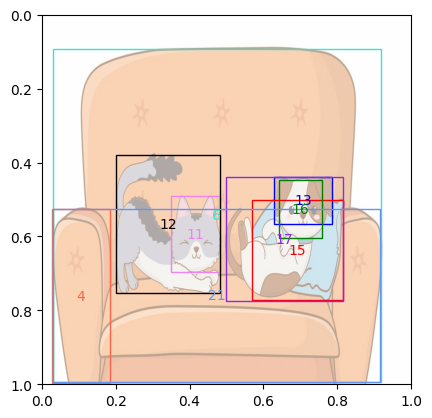

image_15.jpeg


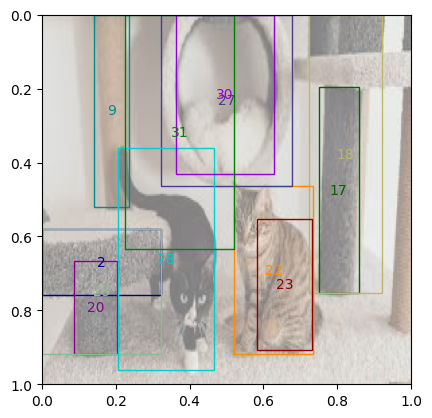

image_6.jpg


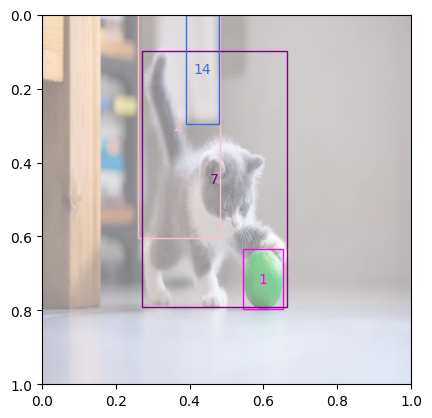

image_13.jpeg


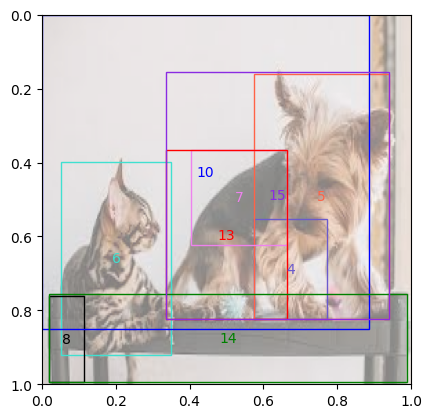

image_11.jpeg


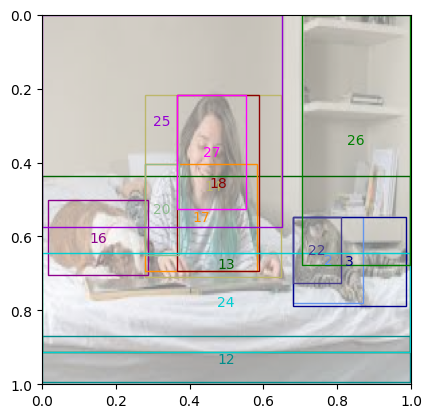

image_5.png


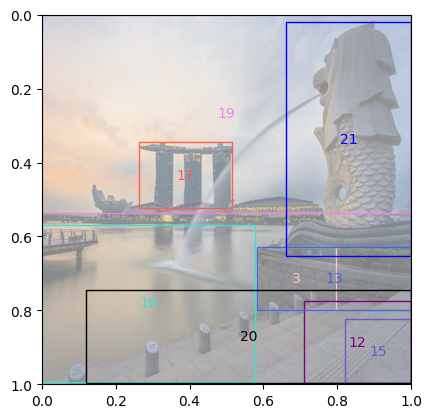

image_12.jpeg


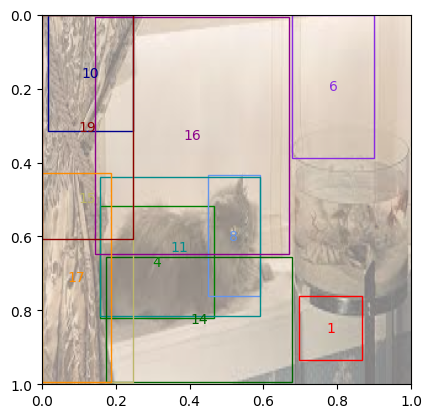

image_4.jpg


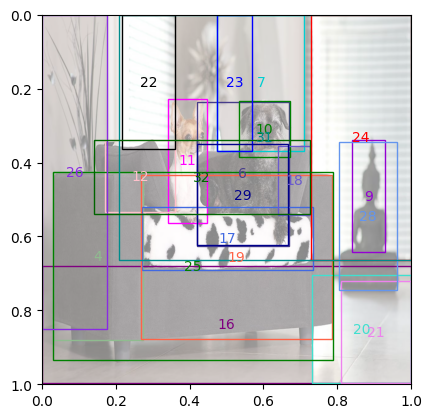

image_7.jpg


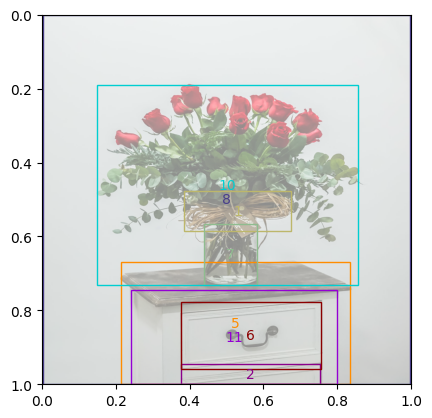

image_9.jpeg


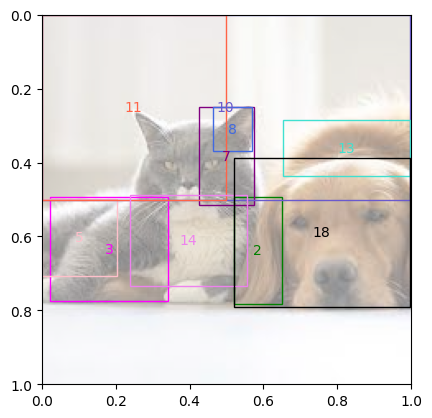

image_2.jpg


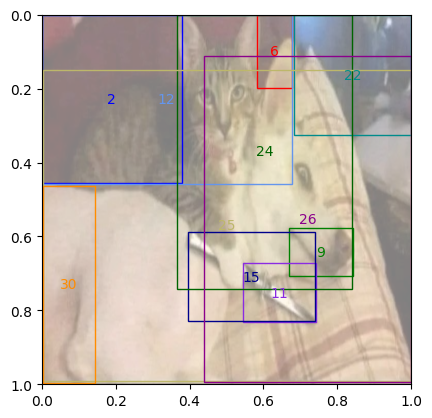

image_1.jpg


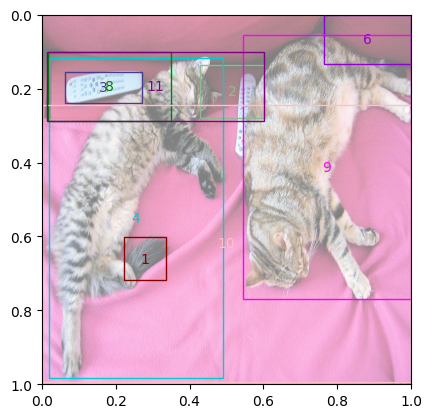

image_10.jpeg


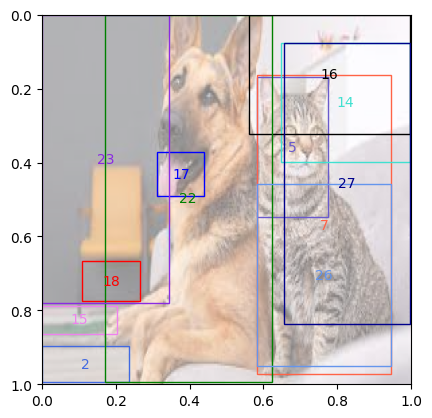

image 8.jpg


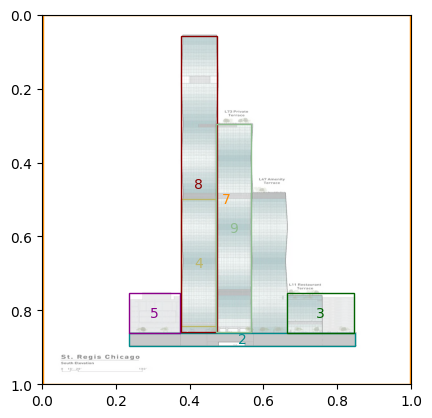

image_14.jpeg


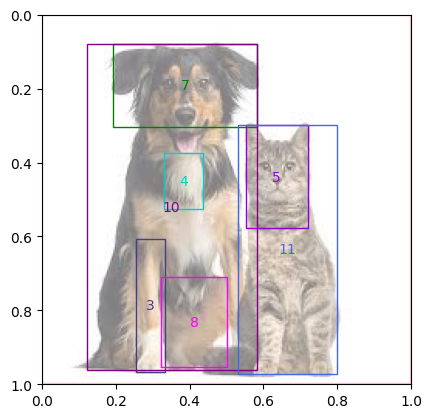

image 8.jpg


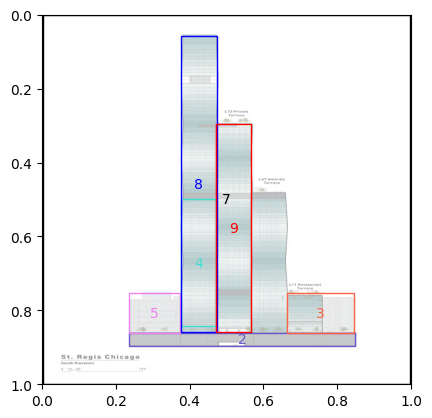

In [30]:
for img0 in data:
    print(img0.name)
    img0.plot_regions()